# Machine Learning for PHP

Prediction of Thermal Resistance and Temperature Drop

In [1]:
# loading ml module
from ml_solution_module import MachineLearning

In [2]:
# assigning to variable and setting output path
ml = MachineLearning("data/")

data/ml_result already exists and ML reuslts will be stored here.


In [3]:
# preparing data and adding sample and FR informationto analysed data
# run this with different FR and Sample name (from experimenal data)
df_w_60 = ml.data_prep('data/di_water_exp/60_FR/gfe_combined.csv', sample='DI Water', fr=60)
df_w_40 = ml.data_prep('data/di_water_exp/40_FR/gfe_combined.csv', sample='DI Water', fr=40)
df_a_40 = ml.data_prep('data/al2o3_diwater_exp/40_FR/gfe_combined.csv', sample='Al2O3 DI Water', fr=40)
df_a_60 = ml.data_prep('data/al2o3_diwater_exp/60_FR/gfe_combined.csv', sample='Al2O3 DI Water', fr=60)

Compiled data stored at data/ml_result/all_combined_data_DI Water_60.csv
Compiled data stored at data/ml_result/all_combined_data_DI Water_40.csv
Compiled data stored at data/ml_result/all_combined_data_Al2O3 DI Water_40.csv
Compiled data stored at data/ml_result/all_combined_data_Al2O3 DI Water_60.csv


In [4]:
# data compile
df = ml.data_compile()

All data compiled in a single csv file and saved at: data/ml_result as all_combined_data.csv


In [5]:
df

,Unnamed: 0,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG[KJ/mol],Fluid,FR
0,0,0.0,298.150000,296.65,1.500000,0.413299,0.018750,-2190.243835,-2179.224665,-11.019171,DI Water,60
1,1,0.5,297.816667,296.65,1.166667,0.413299,0.014583,-2187.795131,-2179.224665,-8.570466,DI Water,60
2,2,1.0,298.150000,296.40,1.750000,0.413299,0.021875,-2190.243835,-2177.388136,-12.855699,DI Water,60
3,3,1.5,300.150000,296.40,3.750000,0.413299,0.046875,-2204.936063,-2177.388136,-27.547927,DI Water,60
4,4,2.0,302.150000,296.40,5.750000,0.413299,0.071875,-2219.628291,-2177.388136,-42.240154,DI Water,60
...,...,...,...,...,...,...,...,...,...,...,...,...
1794,461,48.0,367.483333,344.15,23.333333,1.160357,0.291667,454.402393,425.550139,28.852254,DI Water,40
1795,462,48.5,368.150000,343.65,24.500000,1.160357,0.306250,455.226743,424.931876,30.294867,DI Water,40
1796,463,49.0,367.150000,344.15,23.000000,1.160357,0.287500,453.990218,425.550139,28.440079,DI Water,40
1797,464,49.5,368.483333,343.65,24.833333,1.160357,0.310417,455.638918,424.931876,30.707042,DI Water,40


## Exploratory Data Analysis

Data visualisation

## checking distrubution

<Axes: xlabel='dG[KJ/mol]', ylabel='Density'>

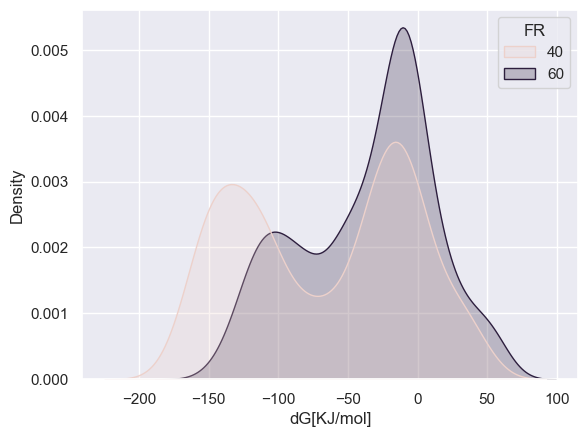

In [6]:
import seaborn as sns
sns.kdeplot(x=df['dG[KJ/mol]'], hue=df['FR'], fill=True)

<Axes: xlabel='dG[KJ/mol]', ylabel='Density'>

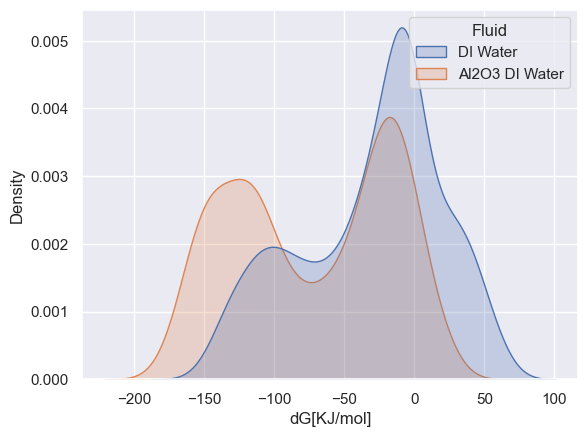

In [7]:
sns.kdeplot(x=df['dG[KJ/mol]'], hue=df['Fluid'], fill=True)

<Axes: xlabel='TR[K/W]', ylabel='Density'>

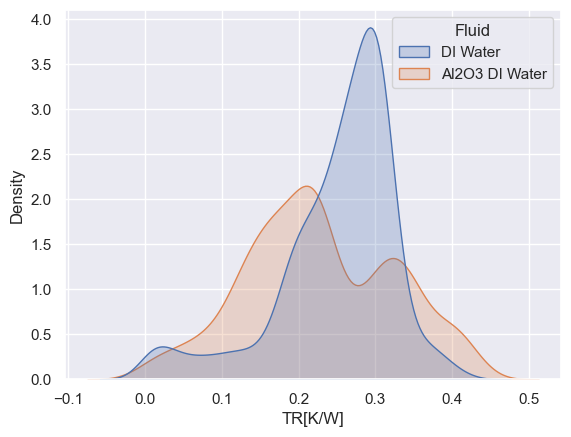

In [8]:
sns.kdeplot(x=df['TR[K/W]'], hue=df['Fluid'], fill=True)

<Axes: xlabel='TR[K/W]', ylabel='Density'>

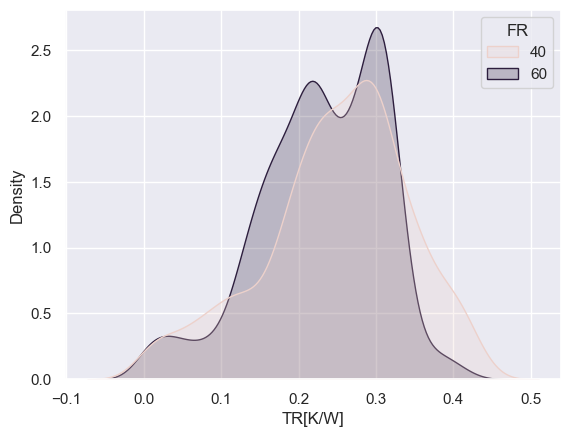

In [9]:
sns.kdeplot(x=df['TR[K/W]'], hue=df['FR'], fill=True)

## Plotting Data

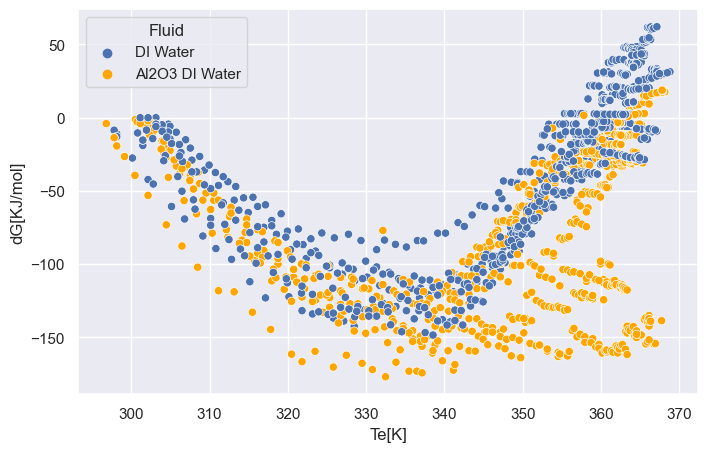

In [10]:
ml.etl_visual(df,y_value='dG[KJ/mol]',hue='Fluid',point=['b', 'orange'])

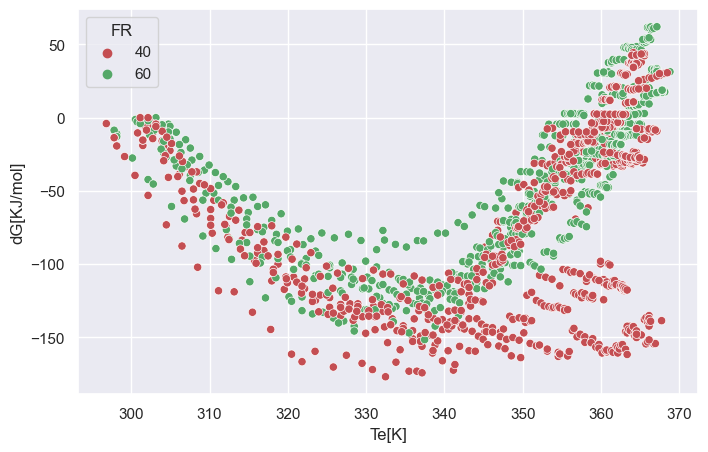

In [11]:
ml.etl_visual(df,y_value='dG[KJ/mol]',hue='FR',point=['r', 'g'])

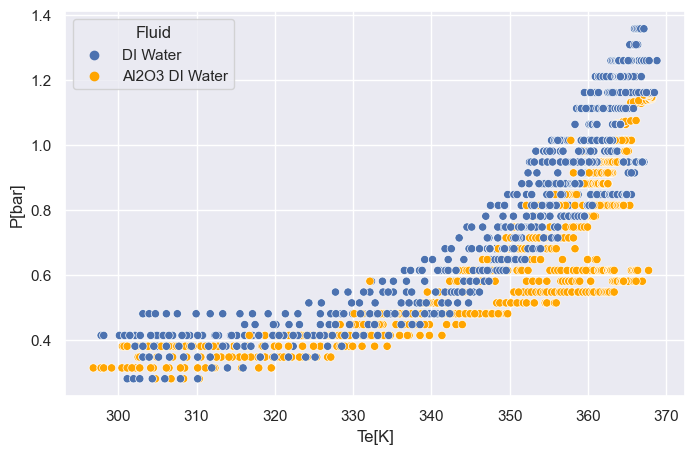

In [12]:
ml.etl_visual(df,y_value='P[bar]',hue='Fluid',point=['b', 'orange'])

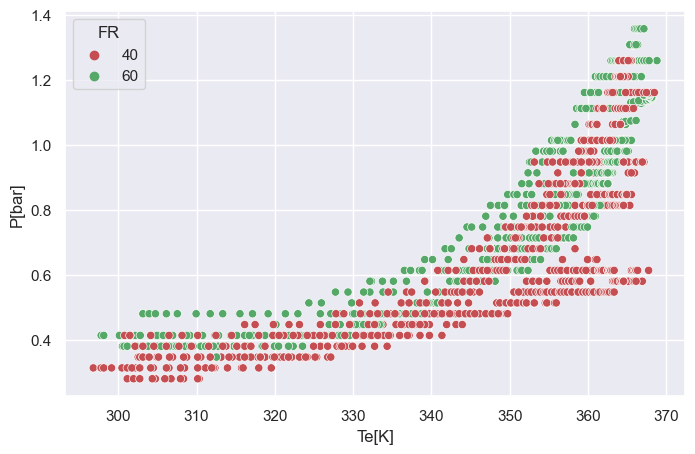

In [13]:
ml.etl_visual(df,y_value='P[bar]',hue='FR',point=['r', 'g'])

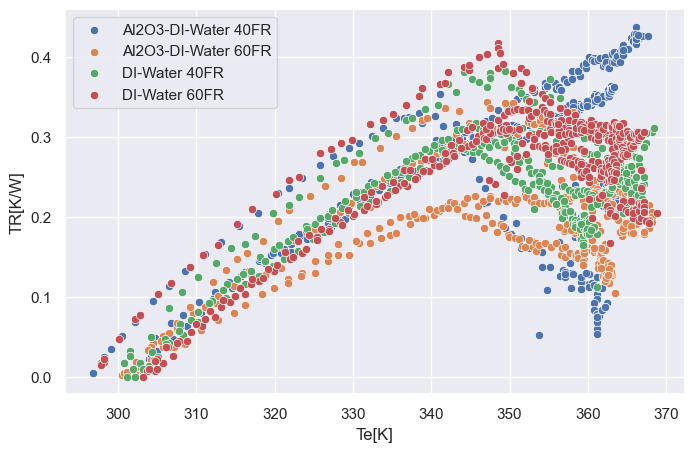

In [14]:
import matplotlib.pyplot as plt
# plotting Thermal resistance
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40['Te[K]'], y=df_a_40['TR[K/W]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60['Te[K]'], y=df_a_60['TR[K/W]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40['Te[K]'], y=df_w_40['TR[K/W]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60['Te[K]'], y=df_w_60['TR[K/W]'], label='DI-Water 60FR')

plt.legend()

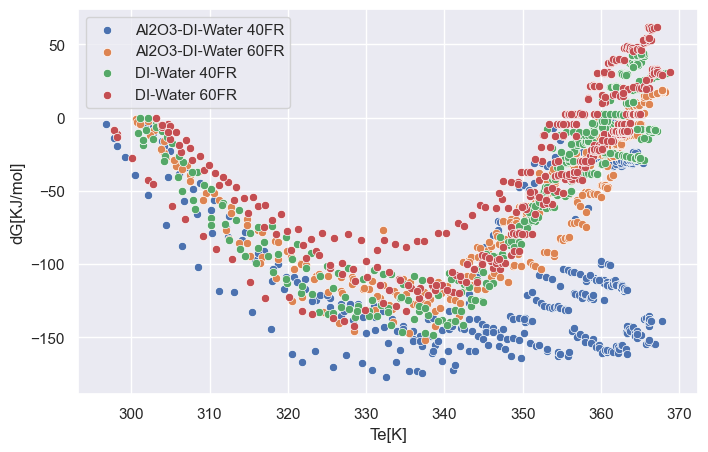

In [15]:
# plotting dG
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40['Te[K]'], y=df_a_40['dG[KJ/mol]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60['Te[K]'], y=df_a_60['dG[KJ/mol]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40['Te[K]'], y=df_w_40['dG[KJ/mol]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60['Te[K]'], y=df_w_60['dG[KJ/mol]'], label='DI-Water 60FR')
plt.legend()

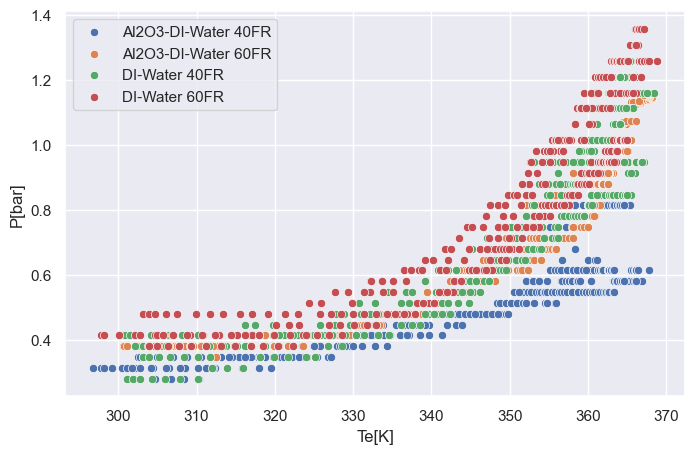

In [16]:
# plotting pressure
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40['Te[K]'], y=df_a_40['P[bar]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60['Te[K]'], y=df_a_60['P[bar]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40['Te[K]'], y=df_w_40['P[bar]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60['Te[K]'], y=df_w_60['P[bar]'], label='DI-Water 60FR')
plt.legend()

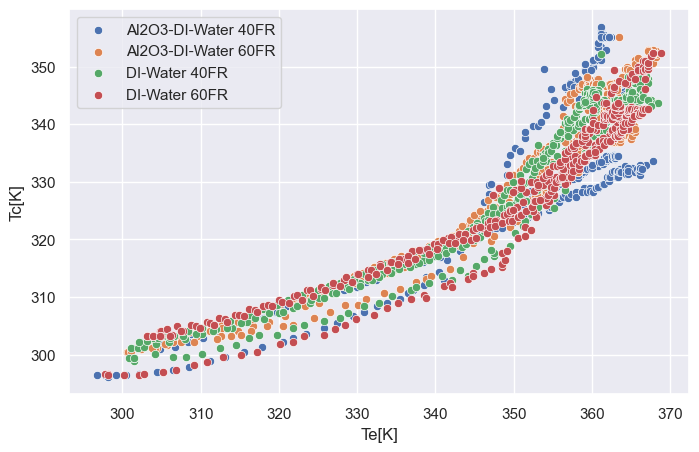

In [17]:
# plotting Tc
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40['Te[K]'], y=df_a_40['Tc[K]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60['Te[K]'], y=df_a_60['Tc[K]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40['Te[K]'], y=df_w_40['Tc[K]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60['Te[K]'], y=df_w_60['Tc[K]'], label='DI-Water 60FR')
plt.legend()

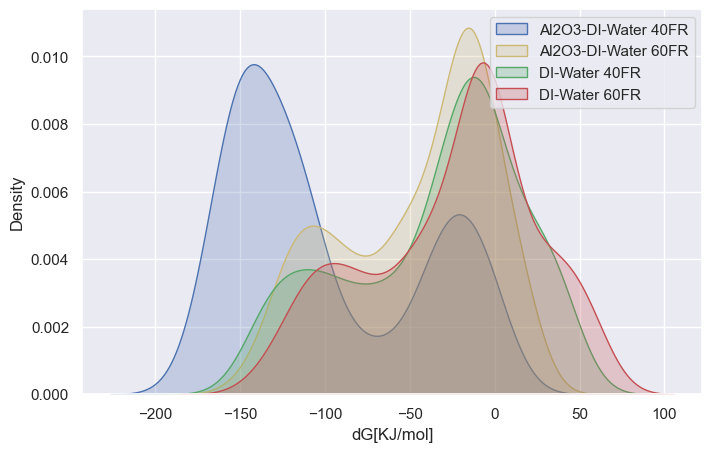

In [18]:
# distrubution overlap for dG
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40['dG[KJ/mol]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60['dG[KJ/mol]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40['dG[KJ/mol]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60['dG[KJ/mol]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()

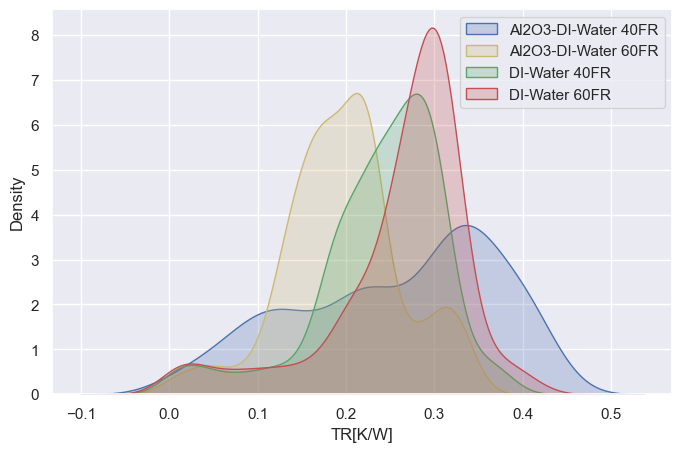

In [19]:
# distrubution overlap for TR
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40['TR[K/W]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60['TR[K/W]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40['TR[K/W]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60['TR[K/W]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()

From the EDA it seems like that, dG data points with more than 1bar pressure need to remove from dataset.
345K is a critical point, after this temperature dG and TR value become inconsitant with each other.
Addition of Al2O3 nanoparticle has significant effect on the internal pressure generation (due to depression in boiling temperature of DI water). This is a proof of the change in the colligative properties dur addition of nanoparticles in the solvant.

In terms of Tr, Al2O3-60FR gave a best result with a pik at 0.2[K/W], where as dG values gives totally different result!